<a href="https://colab.research.google.com/github/sjbaek12/sjbaek12.github.io/blob/master/%ED%85%8C%EC%8A%A4%ED%8A%B8_%EA%B0%95%ED%99%94%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def env():
  price=[]
  for i in range(10):
    bias = np.random.rand(1)
    p = -0.01*(i-50)**2 + bias*10
    price.append(p[0])
  return price

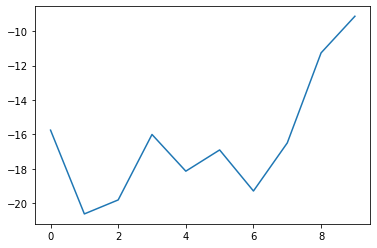

In [3]:
# 환경함수를 통해서 하나의 시장 환경을 만들었다.

price = env()
plt.plot(price)
plt.show()

In [4]:
# 랜덤하게 행동들을 만들어낸다.

def act():
  actions = []
  for i in range(10):
    if np.random.rand() > 0.5:
      act = 1
    else:
      act = 0
    actions.append(act)
  return actions

In [6]:
y = act()
print(y)

[0, 0, 1, 1, 0, 1, 0, 0, 0, 0]


custom loss 함수를 테스트 해본다.

In [7]:
import keras.layers as layers
from keras.layers import LSTM, Dense
from keras.models import Model, Sequential
from keras.optimizers import Adam
import keras.backend as K  # 케라스의 backend를 K. 형식으로 호출하는 것이고 여기서는 tensorflow이다.

Using TensorFlow backend.


In [8]:
def my_loss(y_true, y_pred):
  y_true = y_true **2
  y_pred = y_pred **2
  loss = K.mean(K.abs(y_true - y_pred) + K.square(y_true - y_pred))
  return loss * multip

def custom_loss(y_true, y_pred):
 # actual: 0 predict: 0 -> log(0 * (0 - 0) + (1 - 0) * (0 + 0)) = -inf
 # actual: 1 predict: 1 -> log(1 * (1 - 1) + (1 - 1) * (1 + 1)) = -inf
 # actual: 1 predict: 0 -> log(1 * (1 - 0) + (1 - 1) * (1 + 0)) = 0
 # actual: 0 predict: 1 -> log(0 * (0 - 1) + (1 - 0) * (0 + 1)) = 0
  log_lik = K.log(y_true * (y_true - y_pred) + (1 - y_true) * (y_true + y_pred))
  return K.mean(log_lik * multip, keepdims=True)

def my_metric(y_true, y_pred):
  return K.mean(K.abs(y_true - y_pred)) * 1000

In [9]:
inp = layers.Input(shape=(1,),name="input_x")
multip = layers.Input(shape=(1,), name="advantages")
x = layers.Dense(4, activation="relu", name="dense_1")(inp)
output = layers.Dense(2, activation="softmax", name="out")(x)

modelj = Model(inputs=[inp, multip], outputs = output)
modelk = Model(inputs=inp, outputs = output)
modelk.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_x (InputLayer)         (None, 1)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 8         
_________________________________________________________________
out (Dense)                  (None, 2)                 10        
Total params: 18
Trainable params: 18
Non-trainable params: 0
_________________________________________________________________


In [10]:
modelj.compile(optimizer='adam', loss= custom_loss, metrics=[my_metric])
modelk.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics=[my_metric])

In [11]:
p_mean = np.mean(price)
p_std = np.std(price)

price = (price - p_mean)/p_std

In [12]:
multip = np.array([2.0, 100.0, 5.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0])

In [14]:
multip.shape

(10,)

In [13]:
historyj = modelj.fit([price, multip], y, epochs=10)

Epoch 1/10
10/10 [==============================] - 0s 28ms/step - loss: -8.5476 - my_metric: 500.0000
Epoch 2/10
10/10 [==============================] - 0s 312us/step - loss: -8.5548 - my_metric: 500.0000
Epoch 3/10
10/10 [==============================] - 0s 374us/step - loss: -8.5634 - my_metric: 500.0000
Epoch 4/10
10/10 [==============================] - 0s 359us/step - loss: -8.5727 - my_metric: 500.0000
Epoch 5/10
10/10 [==============================] - 0s 345us/step - loss: -8.5825 - my_metric: 500.0000
Epoch 6/10
10/10 [==============================] - 0s 250us/step - loss: -8.5933 - my_metric: 500.0000
Epoch 7/10
10/10 [==============================] - 0s 315us/step - loss: -8.6040 - my_metric: 500.0000
Epoch 8/10
10/10 [==============================] - 0s 307us/step - loss: -8.6154 - my_metric: 500.0000
Epoch 9/10
10/10 [==============================] - 0s 580us/step - loss: -8.6269 - my_metric: 500.0000
Epoch 10/10
10/10 [==============================] - 0s 173us/ste

In [14]:
historyk = modelk.fit(price, y, epochs=10)

ValueError: ignored

In [15]:
mj = modelj.predict([price, multip])
mk = modelk.predict(price)
print(mj)
print(mk)

[[0.49989438 0.50010556]
 [0.38932258 0.6106774 ]
 [0.40791127 0.59208876]
 [0.49903905 0.50096095]
 [0.44692653 0.55307347]
 [0.47690612 0.5230939 ]
 [0.41993824 0.5800618 ]
 [0.4880018  0.51199824]
 [0.51514995 0.48485005]
 [0.52237123 0.4776288 ]]
[[0.49989438 0.50010556]
 [0.38932258 0.6106774 ]
 [0.40791127 0.59208876]
 [0.49903905 0.50096095]
 [0.44692653 0.55307347]
 [0.47690612 0.5230939 ]
 [0.41993824 0.5800618 ]
 [0.4880018  0.51199824]
 [0.51514995 0.48485005]
 [0.52237123 0.4776288 ]]


여기까지가 커스텀 손실함수 이다.

In [ ]:
# 환경에 대응하는 행동들의 스코어링을 한다.

def score (price, actions):
  rewards = 0
  for i in range(0, len(price)-1):
    reward = price[i+1]- price[i]
    if reward > 0 and actions[i] == 1 :
      rewards += reward
    if reward > 0 and actions[i] == 0 :
      rewards -= reward
    if reward < 0 and actions[i] == 1 :
       rewards += reward
    if reward < 0 and actions[i] == 0 :
       rewards -= reward
  return rewards

In [ ]:
num_games = 10
action_set=[]
reward_set=[]

def best_action_gen ():
  price = env()
  for i in range(num_games):
    actions = act()
    rewards = score(price, actions)
    action_set.append(actions)
    reward_set.append(rewards)

  best_score = np.argmax(reward_set)
  best_action = action_set[best_score]
  return price, best_action


In [ ]:
price, best_action = best_action_gen()

In [ ]:
score(price, best_action)

9.987453629368808

In [ ]:
import keras.layers as layers
from keras.layers import LSTM
from keras.models import Model
from keras.optimizers import Adam
import keras.backend as K  # 케라스의 backend를 K. 형식으로 호출하는 것이고 여기서는 tensorflow이다.

input = layers.Input(shape=(1,1),name="input_x")
x = LSTM(8)(input)
x = layers.Dense(4, activation="sigmoid", name="dense_1")(x)
output = layers.Dense(1, activation="sigmoid", name="out")(x)

train = Model(input, output)
train.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_x (InputLayer)         (None, 1, 1)              0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 8)                 320       
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 36        
_________________________________________________________________
out (Dense)                  (None, 1)                 5         
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________


In [ ]:
train.compile(loss='binary_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])

다음단계로 넘어가기 전에 train_on_batch 함수에 대해서 알아본다.
train_on_batch는 epoch을 1번해서 신경망의 weight를 조정하고, loss와 metric을 return한다. for문으로 5번을 실행시킨 예이다.

In [ ]:
losses = []
price1 = price[:50]
price1 = price1.reshape(1,1)
best_action1 = best_action[:50]
for i in range(5):
  loss = train.train_on_batch(price1, best_action1)
  losses.append(loss)

AttributeError: ignored

In [ ]:
losses

[[0.7842006, 0.6],
 [0.7833426, 0.6],
 [0.78248787, 0.6],
 [0.7816364, 0.6],
 [0.78078824, 0.6]]

In [ ]:
train.compile(loss='binary_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])

In [ ]:
# 정책신경망에서 sigmoid로 산출된 액센들을 1, 0으로 변환

def action_predict(act_hat):
  act_predict = []
  for i in range(100):
    if act_hat[i][0] > 0.5:
      act = 1
    else:
      act = 0
    act_predict.append(act)
  return act_predict

In [ ]:

for i in range(10000):
  price, best_action = best_action_gen()
  history = train.train_on_batch(price, best_action)
  act_hat = train.predict(price)
  action_bot = action_predict(act_hat)
  rewards = score(price, action_bot)
  action_set.append(action_bot)
  reward_set.append(rewards)



In [ ]:
len(action_set)

110010

In [ ]:
  best_score = np.argmax(reward_set)
  best_action = action_set[best_score]

In [ ]:
best_score

88083

In [ ]:
best_action[0]

1

In [ ]:
buy_trend = []
x = 0
for i in range(100):
  x += best_action[i]
  buy_trend.append(x)

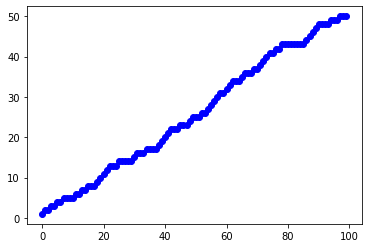

In [ ]:
plt.plot(buy_trend, 'bo')
plt.show()

In [ ]:
test_score = []
for i in range(100):
  state = env()
  test_score.append(score(state, best_action))

In [ ]:
np.mean(test_score)

6.606158632153271

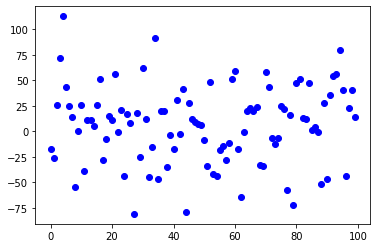

In [ ]:
plt.plot(test_score, 'bo')
plt.show()